In [104]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [106]:
len(train)

1460

In [108]:
sum(1 if train[col].dtype in ('int64', 'float64') else 0 for col in train.columns)

38

In [109]:
train['SalePrice'].dtype

dtype('int64')

In [73]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
print (train.BedroomAbvGr[0],train.Neighborhood[0])

3 CollgCr


In [91]:
#def price_predict(feature1,feature2,w1,w2):
    
def cost(df,feature1,feature2,w1,w2):
    df['predict']=w1*feature1+w2*feature2#+w3*df.Neighborhood
    cost=((df.predict-df.SalePrice)**2).sum()/len(df)
    return cost

#def estimation():
Cost=cost(train,train.LotFrontage,train.YearBuilt,5,5)
print (Cost)

29630072862.816437


In [76]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
xs=[]
ys=[]
zs=[]
for i in range (30):
    for j in range(30):
        w1= 0.01*i+0.1
        w2= 0.01*j+0.3
        xs.append(w1)
        ys.append(w2)
        zs.append(cost(train_t,train_t.LotFrontage,train_t.GarageArea,w1,w2))
       # print (cost(train))

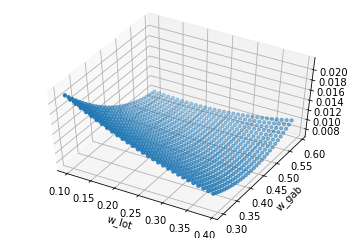

In [96]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.view_init(50)
ax.scatter(xs,ys,zs,s=10)
plt.xlabel('w_lot')
plt.ylabel('w_gab')

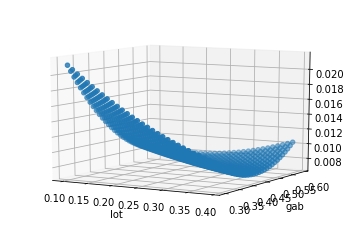

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.view_init(10)
ax.scatter(xs,ys,zs,s=20)
plt.xlabel('lot')
plt.ylabel('gab')

In [95]:
import math
cost1 = math.log(cost(train_t,train_t.LotFrontage,train_t.GarageArea,0.1,0.3))
cost2 = math.log(cost(train_t,train_t.LotFrontage,train_t.GarageArea,0.2,0.4))
print (cost1, cost2)

-3.8503694220618994 -4.52343070892457


# try to find gradient to guide us 

In [81]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

columns = [ 'LotFrontage','GarageArea','SalePrice']
train_t=train[columns].dropna(axis=0)
train_t.LotFrontage/= train_t.LotFrontage.max()
train_t.GarageArea/= train_t.GarageArea.max()
train_t.SalePrice/= train_t.SalePrice.max()
#train_t
regr.fit(X_train, y_train)
print (regr.coef_,regr.intercept_)

[ 0.21627565  0.41024884] 0.0543428481374


In [97]:
def gradient(w1,w2):
    gradient_x =cost(train_t,train_t.LotFrontage,train_t.GarageArea,w1+0.1,w2)-cost(train_t,train_t.LotFrontage,train_t.GarageArea,w1,w2)
    gradient_y= cost(train_t,train_t.LotFrontage,train_t.GarageArea,w1,w2+0.1)-cost(train_t,train_t.LotFrontage,train_t.GarageArea,w1,w2)
    return (gradient_x,gradient_y)

In [98]:
gradient(0.1,0.3)

(-0.004912179429505656, -0.007082708927066866)

In [102]:
def gradient_descent(w1,w2): 
    gradient_x,gradient_y=gradient(w1,w2)
    w1-= gradient_x*0.007
    w2-= gradient_y*0.007
    return (w1,w2)

w1=0.1
w2=0.3
for i in range(5000):
    w1,w2=gradient_descent(w1,w2) 
#    print (w1,w2)
w1,w2

(0.2024174928167493, 0.435931121740333)

# So hear we find the optimal with gradient

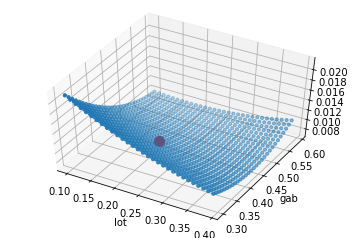

In [103]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.view_init(50)
ax.scatter(xs,ys,zs,s=10)
ax.scatter(0.216,0.410,zs=cost(train_t,train_t.LotFrontage,train_t.GarageArea,0.216,0.410),s=100,
           color='red')
plt.xlabel('lot')
plt.ylabel('gab')

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality

In [60]:
train.corr(method='pearson')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,predict
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,-0.014857
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.224374
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,0.666925
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.281989
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.586318
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.335552
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.821700
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.499151
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.369092
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.326269


In [331]:
from sklearn.cluster import KMeans

In [348]:
k_means = KMeans(n_clusters=2, max_iter=1000, n_init=20)
# Fit
k_means.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=2, n_init=20, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

/home/cruiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/home/cruiser/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/cruiser/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


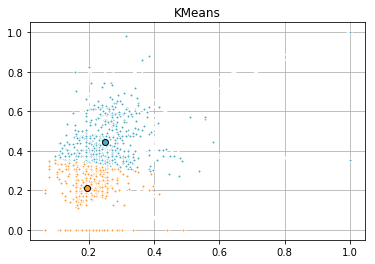

In [349]:
##############################################################################
# Plot result
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.figure()
plt.hold(True)
for k, col in zip(range(2), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X_train.ix[my_members,'LotFrontage'], X_train.ix[my_members, 'GarageArea'], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')    
plt.grid(True)
plt.show()